# Foundational Project


# Stock Forecasting

Group Project By :

Praneeth J

Venkatesh T

Nidhi Srivastava

Siddharth Reddy

Harish Reddy B

# Objective: Stock Forecasting

Importing libraries

In [1]:
import pandas as pd
import numpy as np
import time
from selenium.webdriver import Chrome
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium import webdriver 
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import warnings
warnings.filterwarnings("ignore")
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials
import seaborn as sns
import matplotlib.pyplot as plt
#!pip install autots
from autots import AutoTS, load_daily

Initiating chrome web driver 

In [2]:
class WebDriver(object):

    def __init__(self):
        self.options = Options()

        self.options.binary_location = '/opt/headless-chromium'
        self.options.add_argument('--headless')
        self.options.add_argument('--no-sandbox')
        self.options.add_argument('--start-maximized')
        self.options.add_argument('--start-fullscreen')
        self.options.add_argument('--single-process')
        self.options.add_argument('--disable-dev-shm-usage')

    def get(self):
        driver = webdriver.Chrome(ChromeDriverManager().install())
        return driver

Ticker identification

It typically refers to the process of identifying the unique symbol or code used to represent a publicly traded company or security on a stock exchange

In [3]:
def get_tickers(driver):
    """return the number of tickers available on the webpage"""
    TABLE_CLASS = "W(100%)"  
    tablerows = len(driver.find_elements(By.XPATH, value="//table[@class= '{}']/tbody/tr".format(TABLE_CLASS)))
    return tablerows

Once we have identified the ticker symbol for a specific company or security, there are various types of financial and market data that you are to be retrieved

In [4]:
def parse_ticker(rownum, table_driver):
    """Parsing each Ticker row by row and return the data in the form of Python dictionary"""
    Symbol = table_driver.find_element(By.XPATH, value="//tr[{}]/td[1]".format(rownum)).text
    Name = table_driver.find_element(By.XPATH, value="//tr[{}]/td[2]".format(rownum)).text
    LastPrice = table_driver.find_element(By.XPATH, value="//tr[{}]/td[3]".format(rownum)).text
    MarketTime = table_driver.find_element(By.XPATH, value="//tr[{}]/td[4]".format(rownum)).text
    Change = table_driver.find_element(By.XPATH, value="//tr[{}]/td[5]".format(rownum)).text
    PercentChange = table_driver.find_element(By.XPATH, value="//tr[{}]/td[6]".format(rownum)).text	
    Volume = table_driver.find_element(By.XPATH, value="//tr[{}]/td[7]".format(rownum)).text
    MarketCap = table_driver.find_element(By.XPATH, value="//tr[{}]/td[8]".format(rownum)).text	

    return {
    'Symbol': Symbol,
    'Name': Name,
    'LastPrice': LastPrice,
    'MarketTime': MarketTime,
    'Change': Change,
    'PercentChange': PercentChange,
    'Volume': Volume,
    'MarketCap': MarketCap
    }

By using a personalized screener we select stocks from the NIFTY 50 index

NIFTY 50 is an index of the top 50 companies listed on the National Stock Exchange (NSE) of India, and it includes some of the largest and most well-known companies in the country across a range of industries.

In [5]:
YAHOO_FINANCE_URL = "https://finance.yahoo.com/screener/unsaved/d0ac6574-dc65-4bec-a860-428098c86c2c?offset=0&count=100" 

instance_ = WebDriver()
driver = instance_.get()
driver.get(YAHOO_FINANCE_URL)
print('Fetching the page')
table_rows = get_tickers(driver)
print('Found {} Tickers'.format(table_rows))
print('Parsing Trending tickers')
table_data = [parse_ticker(i, driver) for i in range (1, table_rows + 1)]
driver.close()
driver.quit()

Fetching the page
Found 100 Tickers
Parsing Trending tickers


In [6]:
table_data

[{'Symbol': 'RELIANCE.NS',
  'Name': 'Reliance Industries Limited',
  'LastPrice': '2,383.70',
  'MarketTime': '+16.20',
  'Change': '+0.68%',
  'PercentChange': '4.353M',
  'Volume': '5.947M',
  'MarketCap': '16.128T'},
 {'Symbol': 'RELIANCE.BO',
  'Name': 'Reliance Industries Limited',
  'LastPrice': '2,385.80',
  'MarketTime': '+18.25',
  'Change': '+0.77%',
  'PercentChange': '249,650',
  'Volume': '692,756',
  'MarketCap': '16.136T'},
 {'Symbol': 'TCS.NS',
  'Name': 'Tata Consultancy Services Limited',
  'LastPrice': '3,400.45',
  'MarketTime': '-13.35',
  'Change': '-0.39%',
  'PercentChange': '977,461',
  'Volume': '1.65M',
  'MarketCap': '12.442T'},
 {'Symbol': 'TCS.BO',
  'Name': 'Tata Consultancy Services Limited',
  'LastPrice': '3,400.05',
  'MarketTime': '-14.05',
  'Change': '-0.41%',
  'PercentChange': '35,329',
  'Volume': '193,862',
  'MarketCap': '12.761T'},
 {'Symbol': 'HDFCBANK.NS',
  'Name': 'HDFC Bank Limited',
  'LastPrice': '1,588.95',
  'MarketTime': '-14.30',


Removing duplicates from the data set

In [7]:
type(table_data)
table_data_df=pd.DataFrame(table_data)
table_data_df =table_data_df.drop_duplicates("Name")
table_data_df

,Symbol,Name,LastPrice,MarketTime,Change,PercentChange,Volume,MarketCap
0,RELIANCE.NS,Reliance Industries Limited,"2,383.70",+16.20,+0.68%,4.353M,5.947M,16.128T
2,TCS.NS,Tata Consultancy Services Limited,"3,400.45",-13.35,-0.39%,"977,461",1.65M,12.442T
4,HDFCBANK.NS,HDFC Bank Limited,"1,588.95",-14.30,-0.89%,8.53M,6.486M,8.863T
6,INFY.NS,Infosys Limited,"1,550.65",-0.05,-0.00%,2.791M,5.834M,6.467T
7,ICICIBANK.NS,ICICI Bank Limited,839.70,-0.05,-0.01%,8.246M,12.796M,5.862T
...,...,...,...,...,...,...,...,...
92,DIVISLAB.BO,Divi's Laboratories Limited,"2,915.40",+42.15,+1.47%,"42,785","60,447",773.645B
93,BANKBARODA.NS,Bank of Baroda,154.60,-0.90,-0.58%,22.595M,28.96M,799.492B
94,ADANITRANS.NS,Adani Transmission Limited,712.30,-37.45,-4.99%,"108,541","809,929",794.564B
96,CIPLA.NS,Cipla Limited,961.80,+1.50,+0.16%,1.585M,1.405M,777.441B


In [8]:
table_data_df.dtypes

Symbol           object
Name             object
LastPrice        object
MarketTime       object
Change           object
PercentChange    object
Volume           object
MarketCap        object
dtype: object

Using change as a factor for shortlisting stocks is a common approach, as it can provide insight into how the stock has performed over a specific period of time. However, there are many other methods and factors that can be used to select stocks, depending on your investment objectives and risk tolerance.

In [9]:
table_data_df['Change']=table_data_df['Change'].str.rstrip("%")
table_data_df

,Symbol,Name,LastPrice,MarketTime,Change,PercentChange,Volume,MarketCap
0,RELIANCE.NS,Reliance Industries Limited,"2,383.70",+16.20,+0.68,4.353M,5.947M,16.128T
2,TCS.NS,Tata Consultancy Services Limited,"3,400.45",-13.35,-0.39,"977,461",1.65M,12.442T
4,HDFCBANK.NS,HDFC Bank Limited,"1,588.95",-14.30,-0.89,8.53M,6.486M,8.863T
6,INFY.NS,Infosys Limited,"1,550.65",-0.05,-0.00,2.791M,5.834M,6.467T
7,ICICIBANK.NS,ICICI Bank Limited,839.70,-0.05,-0.01,8.246M,12.796M,5.862T
...,...,...,...,...,...,...,...,...
92,DIVISLAB.BO,Divi's Laboratories Limited,"2,915.40",+42.15,+1.47,"42,785","60,447",773.645B
93,BANKBARODA.NS,Bank of Baroda,154.60,-0.90,-0.58,22.595M,28.96M,799.492B
94,ADANITRANS.NS,Adani Transmission Limited,712.30,-37.45,-4.99,"108,541","809,929",794.564B
96,CIPLA.NS,Cipla Limited,961.80,+1.50,+0.16,1.585M,1.405M,777.441B


In [10]:
table_data_df = table_data_df.astype({'Change':'float'})

In [11]:
table_data_df.dtypes

Symbol            object
Name              object
LastPrice         object
MarketTime        object
Change           float64
PercentChange     object
Volume            object
MarketCap         object
dtype: object

Filter the best performer of current day stock

In [12]:
table_data_df
names=table_data_df[table_data_df["Change"]==table_data_df["Change"].max()]["Name"] 
Symbol=table_data_df[table_data_df["Change"]==table_data_df["Change"].max()]["Symbol"]

In [13]:
Symbol

92    DIVISLAB.BO
Name: Symbol, dtype: object

 Using selected ticker for long term and short term

In [14]:
yahoo_financials = YahooFinancials('DIVISLAB.BO')
data=yahoo_financials.get_historical_price_data("2022-06-10", "2023-03-25", "daily")
btc_df = pd.DataFrame(data['DIVISLAB.BO']['prices'])
btc_df = btc_df.drop('date', axis=1).set_index('formatted_date')
btc_df
btc_df.dropna(how='any',inplace=True)

Analysing change in daily basis

<AxesSubplot:title={'center':' stock price'}, xlabel='formatted_date'>

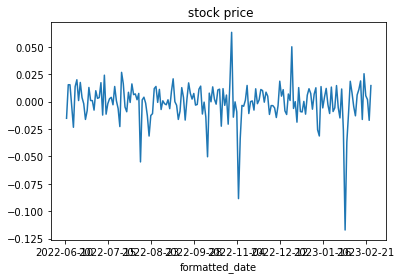

In [15]:
change= btc_df['adjclose'].pct_change()
change.plot(title=" stock price")

In [16]:
len(btc_df)

179

Formating series to time series

In [17]:
df_s = btc_df[[ 'adjclose']]

df_s.index = pd.to_datetime(df_s.index)
df_s = df_s.sort_values('formatted_date')
df_s

,adjclose
formatted_date,
2022-06-10,3499.339600
2022-06-13,3446.246338
2022-06-14,3499.587646
2022-06-15,3553.474854
2022-06-16,3537.546875
...,...
2023-02-20,2901.600098
2023-02-21,2917.399902
2023-02-22,2923.050049


Train data

In [18]:
train_df_s = df_s.iloc[:172]
train_df_s

,adjclose
formatted_date,
2022-06-10,3499.339600
2022-06-13,3446.246338
2022-06-14,3499.587646
2022-06-15,3553.474854
2022-06-16,3537.546875
...,...
2023-02-09,2823.399902
2023-02-10,2810.850098
2023-02-13,2774.550049


Test data

In [19]:
test_df_s = df_s.iloc[172:]
test_df_s

,adjclose
formatted_date,
2023-02-16,2876.100098
2023-02-17,2829.399902
2023-02-20,2901.600098
2023-02-21,2917.399902
2023-02-22,2923.050049
2023-02-23,2873.250000
2023-02-24,2915.399902


 Plotting train and test data

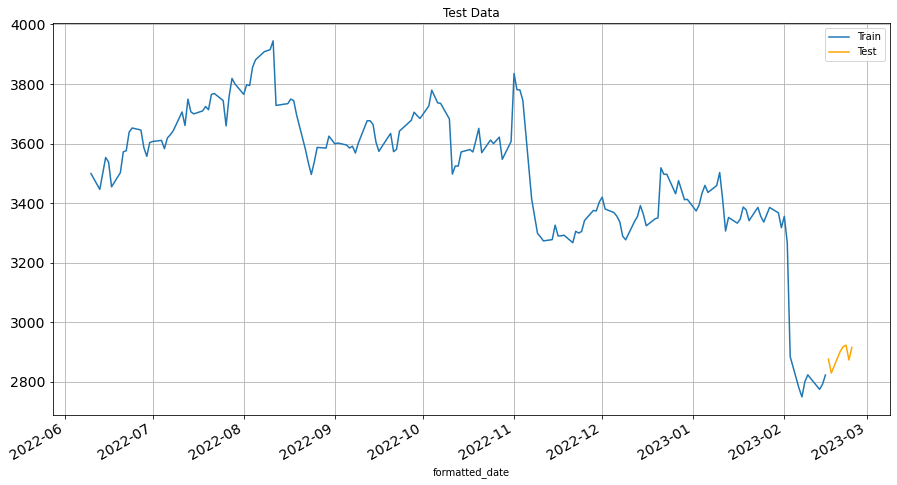

In [20]:
plt.title('Divis Lab', size=20)
train_df_s.adjclose.plot(figsize=(15,8), title= 'Train Data', fontsize=14, label='Train')
test_df_s.adjclose.plot(figsize=(15,8), title= 'Test Data', fontsize=14, label='Test',color='orange')
plt.legend()
plt.grid()
plt.show()

Setting AutoTS for varius hyder parameters, basic are forecast time - 5 days 

In [21]:
model = AutoTS(
    forecast_length=5,
    frequency='infer',
    prediction_interval=0.9,
    ensemble=None,
    model_list="fast",  # "superfast", "default", "fast_parallel"
    transformer_list="fast",  # "superfast",
    drop_most_recent=1,
    max_generations=4,
    num_validations=2,
    validation_method="backwards"
)

In [22]:
#selecting format horizontal or vertical data
long = False 

Model fitting

In [23]:
 model = model.fit(
    train_df_s,
    date_col='datetime' if long else None,
    value_col='value' if long else None,
    id_col='series_id' if long else None,
)

Inferred frequency is: B
Model Number: 1 with model AverageValueNaive in generation 0 of 4
Model Number: 2 with model AverageValueNaive in generation 0 of 4
Model Number: 3 with model AverageValueNaive in generation 0 of 4
Model Number: 4 with model DatepartRegression in generation 0 of 4
Model Number: 5 with model DatepartRegression in generation 0 of 4
Model Number: 6 with model DatepartRegression in generation 0 of 4
Model Number: 7 with model DatepartRegression in generation 0 of 4
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 7: DatepartRegression
Model Number: 8 with model ETS in generation 0 of 4
Model Number: 9 with model ETS in generation 0 of 4
Model Number: 10 with model GLM in generation 0 of 4
Model Number: 11 with model GLM in generation 0 of 4
Model Number: 12 with model GLS in generation 0 of 4
Model Number: 13 with model GLS in generation 0 of 4
Model Number: 14 with model LastValueNaive in generation 0 of 4

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 40 with model NVAR in generation 0 of 4
Model Number: 41 with model Cassandra in generation 0 of 4
Template Eval Error: Exception("unrecognized dates: Index([], dtype='object', name='date')") in model 41: Cassandra
Model Number: 42 with model ConstantNaive in generation 0 of 4
Model Number: 43 with model LastValueNaive in generation 0 of 4
Model Number: 44 with model AverageValueNaive in generation 0 of 4
Model Number: 45 with model GLS in generation 0 of 4
Model Number: 46 with model SeasonalNaive in generation 0 of 4
Model Number: 47 with model GLM in generation 0 of 4
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 47: GLM
Model Number: 48 with model ETS in generation 0 of 4
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on adjclose with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Numbe

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s


Model Number: 192 with model NVAR in generation 1 of 4
Model Number: 193 with model SeasonalityMotif in generation 1 of 4


[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.


Model Number: 194 with model DatepartRegression in generation 1 of 4
Model Number: 195 with model SeasonalNaive in generation 1 of 4


[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 196 with model MAR in generation 1 of 4
Model Number: 197 with model UnivariateMotif in generation 1 of 4
Model Number: 198 with model SectionalMotif in generation 1 of 4
Model Number: 199 with model MAR in generation 1 of 4
Model Number: 200 with model MultivariateMotif in generation 1 of 4
Model Number: 201 with model DatepartRegression in generation 1 of 4
Model Number: 202 with model RRVAR in generation 1 of 4
Model Number: 203 with model WindowRegression in generation 1 of 4
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 203: WindowRegression
Model Number: 204 with model SectionalMotif in generation 1 of 4
Template Eval Error: ValueError('kth(=20) out of bounds (16)') in model 204: SectionalMotif
Model Number: 205 with model AverageValueNaive in generation 1 of 4
Model Number: 206 with model LastValueNaive in generation 1 of 4
Model Number: 207 with model ConstantNaive in generation 1 of 4
Model Number: 208 with mode

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.


Model Number: 248 with model GLM in generation 1 of 4
Model Number: 249 with model MultivariateMotif in generation 1 of 4
Model Number: 250 with model AverageValueNaive in generation 1 of 4
Model Number: 251 with model ETS in generation 1 of 4


[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


New Generation: 2 of 4
Model Number: 252 with model LastValueNaive in generation 2 of 4
Model Number: 253 with model SeasonalityMotif in generation 2 of 4
Model Number: 254 with model ConstantNaive in generation 2 of 4
Model Number: 255 with model ETS in generation 2 of 4
Model Number: 256 with model MultivariateMotif in generation 2 of 4
Model Number: 257 with model AverageValueNaive in generation 2 of 4
Model Number: 258 with model NVAR in generation 2 of 4
Model Number: 259 with model MetricMotif in generation 2 of 4
Template Eval Error: IndexError('index 117 is out of bounds for axis 0 with size 34') in model 259: MetricMotif
Model Number: 260 with model KalmanStateSpace in generation 2 of 4
Model Number: 261 with model MultivariateMotif in generation 2 of 4
Model Number: 262 with model MetricMotif in generation 2 of 4
Model Number: 263 with model DatepartRegression in generation 2 of 4
Model Number: 264 with model GLM in generation 2 of 4
Model Number: 265 with model SeasonalNaive

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s


Model Number: 320 with model AverageValueNaive in generation 2 of 4


[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 321 with model DatepartRegression in generation 2 of 4
Model Number: 322 with model GLS in generation 2 of 4
Model Number: 323 with model GLM in generation 2 of 4
Model Number: 324 with model RRVAR in generation 2 of 4
Model Number: 325 with model RRVAR in generation 2 of 4
Model Number: 326 with model SeasonalNaive in generation 2 of 4
Model Number: 327 with model ETS in generation 2 of 4
Model Number: 328 with model LastValueNaive in generation 2 of 4
Model Number: 329 with model MetricMotif in generation 2 of 4
Model Number: 330 with model GLS in generation 2 of 4
Model Number: 331 with model AverageValueNaive in generation 2 of 4
Model Number: 332 with model SectionalMotif in generation 2 of 4
Model Number: 333 with model SectionalMotif in generation 2 of 4
Model Number: 334 with model SeasonalityMotif in generation 2 of 4
Model Number: 335 with model MetricMotif in generation 2 of 4
Model Number: 336 with model SeasonalNaive in generation 2 of 4
Model Number: 337 wit

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 359 with model KalmanStateSpace in generation 3 of 4
Model Number: 360 with model DatepartRegression in generation 3 of 4
Model Number: 361 with model NVAR in generation 3 of 4
Model Number: 362 with model DatepartRegression in generation 3 of 4
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 362: DatepartRegression
Model Number: 363 with model GLS in generation 3 of 4
Model Number: 364 with model GLS in generation 3 of 4
Model Number: 365 with model LastValueNaive in generation 3 of 4
Model Number: 366 with model SeasonalNaive in generation 3 of 4
Model Number: 367 with model SeasonalityMotif in generation 3 of 4
Model Number: 368 with model RRVAR in generation 3 of 4
Model Number: 369 with model SectionalMotif in generation 3 of 4
Template Eval Error: ValueError('kth(=100) out of bounds (81)') in model 369: SectionalMotif
Model Number: 370 with model NVAR in generation 3 of 4
Model Number: 371 with model Kalman

C:\Users\Praneeth\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 386 with model UnivariateMotif in generation 3 of 4
Model Number: 387 with model RRVAR in generation 3 of 4
Model Number: 388 with model ETS in generation 3 of 4
Model Number: 389 with model RRVAR in generation 3 of 4
Model Number: 390 with model SectionalMotif in generation 3 of 4
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 390: SectionalMotif
Model Number: 391 with model MetricMotif in generation 3 of 4
Model Number: 392 with model SectionalMotif in generation 3 of 4
Template Eval Error: ValueError('kth(=100) out of bounds (81)') in model 392: SectionalMotif
Model Number: 393 with model MAR in generation 3 of 4
Model Number: 394 with model RRVAR in generation 3 of 4
Model Number: 395 with model DatepartRegression in generation 3 of 4


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s


Model Number: 396 with model MetricMotif in generation 3 of 4
Model Number: 397 with model AverageValueNaive in generation 3 of 4
Model Number: 398 with model SeasonalityMotif in generation 3 of 4
Model Number: 399 with model RRVAR in generation 3 of 4


[Parallel(n_jobs=7)]: Done 300 out of 300 | elapsed:    0.0s finished


Model Number: 400 with model MetricMotif in generation 3 of 4
Model Number: 401 with model SeasonalityMotif in generation 3 of 4
Model Number: 402 with model NVAR in generation 3 of 4
Model Number: 403 with model ETS in generation 3 of 4
Model Number: 404 with model GLS in generation 3 of 4
Model Number: 405 with model DatepartRegression in generation 3 of 4


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 406 with model SectionalMotif in generation 3 of 4
Model Number: 407 with model SeasonalityMotif in generation 3 of 4
Model Number: 408 with model SectionalMotif in generation 3 of 4
Model Number: 409 with model LastValueNaive in generation 3 of 4
Model Number: 410 with model MultivariateMotif in generation 3 of 4
Model Number: 411 with model MultivariateMotif in generation 3 of 4
Model Number: 412 with model RRVAR in generation 3 of 4
Model Number: 413 with model DatepartRegression in generation 3 of 4
Model Number: 414 with model LastValueNaive in generation 3 of 4
Model Number: 415 with model NVAR in generation 3 of 4
Model Number: 416 with model AverageValueNaive in generation 3 of 4
Model Number: 417 with model SeasonalityMotif in generation 3 of 4
Model Number: 418 with model MAR in generation 3 of 4
Model Number: 419 with model ETS in generation 3 of 4
Model Number: 420 with model RRVAR in generation 3 of 4
Model Number: 421 with model LastValueNaive in generation 

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.


Model Number: 454 with model ETS in generation 3 of 4
Model Number: 455 with model ETS in generation 3 of 4


[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 456 with model MetricMotif in generation 3 of 4
Model Number: 457 with model ConstantNaive in generation 3 of 4
Model Number: 458 with model LastValueNaive in generation 3 of 4
Model Number: 459 with model AverageValueNaive in generation 3 of 4
Model Number: 460 with model GLS in generation 3 of 4
Model Number: 461 with model KalmanStateSpace in generation 3 of 4
New Generation: 4 of 4
Model Number: 462 with model LastValueNaive in generation 4 of 4
Model Number: 463 with model LastValueNaive in generation 4 of 4
Model Number: 464 with model LastValueNaive in generation 4 of 4
Model Number: 465 with model DatepartRegression in generation 4 of 4
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 465: DatepartRegression
Model Number: 466 with model SectionalMotif in generation 4 of 4
Model Number: 467 with model SectionalMotif in generation 4 of 4
Model Number: 468 with model NVAR in generation 4 of 4
Model Number: 469 with mod

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 520 with model SectionalMotif in generation 4 of 4
Model Number: 521 with model ETS in generation 4 of 4
Model Number: 522 with model LastValueNaive in generation 4 of 4
Model Number: 523 with model SectionalMotif in generation 4 of 4
Model Number: 524 with model MetricMotif in generation 4 of 4
Model Number: 525 with model AverageValueNaive in generation 4 of 4
Model Number: 526 with model GLS in generation 4 of 4
Model Number: 527 with model SeasonalityMotif in generation 4 of 4
Model Number: 528 with model UnivariateMotif in generation 4 of 4
Model Number: 529 with model NVAR in generation 4 of 4
Model Number: 530 with model LastValueNaive in generation 4 of 4
Model Number: 531 with model GLS in generation 4 of 4
Model Number: 532 with model RRVAR in generation 4 of 4
Model Number: 533 with model MetricMotif in generation 4 of 4
Model Number: 534 with model GLS in generation 4 of 4
Model Number: 535 with model RRVAR in generation 4 of 4
Model Number: 536 with model Sea

C:\Users\Praneeth\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Model Number: 551 with model Cassandra in generation 4 of 4
Model Number: 552 with model GLS in generation 4 of 4
Model Number: 553 with model KalmanStateSpace in generation 4 of 4
Model Number: 554 with model MAR in generation 4 of 4
Model Number: 555 with model RRVAR in generation 4 of 4
Model Number: 556 with model LastValueNaive in generation 4 of 4
Model Number: 557 with model ETS in generation 4 of 4
Model Number: 558 with model RRVAR in generation 4 of 4
Model Number: 559 with model ETS in generation 4 of 4
Model Number: 560 with model AverageValueNaive in generation 4 of 4
Model Number: 561 with model MultivariateMotif in generation 4 of 4
Model Number: 562 with model MetricMotif in generation 4 of 4
Model Number: 563 with model RRVAR in generation 4 of 4
Model Number: 564 with model MAR in generation 4 of 4
Model Number: 565 with model GLM in generation 4 of 4
Model Number: 566 with model ConstantNaive in generation 4 of 4


C:\Users\Praneeth\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


Ensembling Error: KeyError('TotalRuntime')
Validation Round: 1
Model Number: 1 of 85 with model MetricMotif for Validation 1
📈 1 - MetricMotif with avg smape 9.15: 
Model Number: 2 of 85 with model RRVAR for Validation 1
2 - RRVAR with avg smape 9.68: 
Model Number: 3 of 85 with model RRVAR for Validation 1
3 - RRVAR with avg smape 9.68: 
Model Number: 4 of 85 with model ConstantNaive for Validation 1
4 - ConstantNaive with avg smape 9.51: 
Model Number: 5 of 85 with model RRVAR for Validation 1
5 - RRVAR with avg smape 9.68: 
Model Number: 6 of 85 with model LastValueNaive for Validation 1
6 - LastValueNaive with avg smape 10.38: 
Model Number: 7 of 85 with model LastValueNaive for Validation 1
7 - LastValueNaive with avg smape 11.7: 
Model Number: 8 of 85 with model GLS for Validation 1
8 - GLS with avg smape 11.24: 
Model Number: 9 of 85 with model GLS for Validation 1
9 - GLS with avg smape 11.26: 
Model Number: 10 of 85 with model LastValueNaive for Validation 1
10 - LastValueNaiv

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


31 - DatepartRegression with avg smape 10.91: 
Model Number: 32 of 85 with model DatepartRegression for Validation 1
32 - DatepartRegression with avg smape 11.53: 
Model Number: 33 of 85 with model NVAR for Validation 1
33 - NVAR with avg smape 11.36: 
Model Number: 34 of 85 with model NVAR for Validation 1
34 - NVAR with avg smape 11.36: 
Model Number: 35 of 85 with model MetricMotif for Validation 1
35 - MetricMotif with avg smape 10.37: 
Model Number: 36 of 85 with model DatepartRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


36 - DatepartRegression with avg smape 11.2: 
Model Number: 37 of 85 with model DatepartRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


37 - DatepartRegression with avg smape 11.16: 
Model Number: 38 of 85 with model MetricMotif for Validation 1
38 - MetricMotif with avg smape 9.9: 
Model Number: 39 of 85 with model MetricMotif for Validation 1
📈 39 - MetricMotif with avg smape 8.86: 
Model Number: 40 of 85 with model GLM for Validation 1
40 - GLM with avg smape 18.37: 
Model Number: 41 of 85 with model WindowRegression for Validation 1
41 - WindowRegression with avg smape 10.67: 
Model Number: 42 of 85 with model AverageValueNaive for Validation 1
42 - AverageValueNaive with avg smape 11.14: 
Model Number: 43 of 85 with model GLS for Validation 1
43 - GLS with avg smape 10.9: 
Model Number: 44 of 85 with model AverageValueNaive for Validation 1
44 - AverageValueNaive with avg smape 10.75: 
Model Number: 45 of 85 with model NVAR for Validation 1
45 - NVAR with avg smape 11.17: 
Model Number: 46 of 85 with model AverageValueNaive for Validation 1
46 - AverageValueNaive with avg smape 10.76: 
Model Number: 47 of 85 with 

C:\Users\Praneeth\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


69 - NVAR with avg smape 10.7: 
Model Number: 70 of 85 with model MAR for Validation 1
70 - MAR with avg smape 10.29: 
Model Number: 71 of 85 with model GLM for Validation 1
71 - GLM with avg smape 10.32: 
Model Number: 72 of 85 with model MultivariateMotif for Validation 1
72 - MultivariateMotif with avg smape 11.05: 
Model Number: 73 of 85 with model SeasonalityMotif for Validation 1
73 - SeasonalityMotif with avg smape 11.52: 
Model Number: 74 of 85 with model SectionalMotif for Validation 1
74 - SectionalMotif with avg smape 11.41: 
Model Number: 75 of 85 with model SeasonalityMotif for Validation 1
75 - SeasonalityMotif with avg smape 11.82: 
Model Number: 76 of 85 with model SectionalMotif for Validation 1
76 - SectionalMotif with avg smape 10.78: 
Model Number: 77 of 85 with model SectionalMotif for Validation 1
77 - SectionalMotif with avg smape 11.5: 
Model Number: 78 of 85 with model SectionalMotif for Validation 1
78 - SectionalMotif with avg smape 10.96: 
Model Number: 79 o

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


31 - DatepartRegression with avg smape 1.11: 
Model Number: 32 of 85 with model DatepartRegression for Validation 2
32 - DatepartRegression with avg smape 0.76: 
Model Number: 33 of 85 with model NVAR for Validation 2
33 - NVAR with avg smape 0.97: 
Model Number: 34 of 85 with model NVAR for Validation 2
34 - NVAR with avg smape 0.97: 
Model Number: 35 of 85 with model MetricMotif for Validation 2
35 - MetricMotif with avg smape 0.83: 
Model Number: 36 of 85 with model DatepartRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s


36 - DatepartRegression with avg smape 1.07: 
Model Number: 37 of 85 with model DatepartRegression for Validation 2
37 - DatepartRegression with avg smape 1.11: 
Model Number: 38 of 85 with model MetricMotif for Validation 2
38 - MetricMotif with avg smape 7.0: 
Model Number: 39 of 85 with model MetricMotif for Validation 2


[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


39 - MetricMotif with avg smape 2.95: 
Model Number: 40 of 85 with model GLM for Validation 2
40 - GLM with avg smape 0.75: 
Model Number: 41 of 85 with model WindowRegression for Validation 2
41 - WindowRegression with avg smape 0.76: 
Model Number: 42 of 85 with model AverageValueNaive for Validation 2
42 - AverageValueNaive with avg smape 0.97: 
Model Number: 43 of 85 with model GLS for Validation 2
43 - GLS with avg smape 0.77: 
Model Number: 44 of 85 with model AverageValueNaive for Validation 2
📈 44 - AverageValueNaive with avg smape 0.71: 
Model Number: 45 of 85 with model NVAR for Validation 2
45 - NVAR with avg smape 0.84: 
Model Number: 46 of 85 with model AverageValueNaive for Validation 2
46 - AverageValueNaive with avg smape 0.86: 
Model Number: 47 of 85 with model SeasonalNaive for Validation 2
47 - SeasonalNaive with avg smape 0.86: 
Model Number: 48 of 85 with model SeasonalNaive for Validation 2
48 - SeasonalNaive with avg smape 1.0: 
Model Number: 49 of 85 with model 

C:\Users\Praneeth\anaconda3\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:298: DomainWarning: The inverse_power link function does not respect the domain of the Gamma family.
  warnings.warn((f"The {type(family.link).__name__} link function "


69 - NVAR with avg smape 0.73: 
Model Number: 70 of 85 with model MAR for Validation 2
70 - MAR with avg smape 1.59: 
Model Number: 71 of 85 with model GLM for Validation 2
71 - GLM with avg smape 0.77: 
Model Number: 72 of 85 with model MultivariateMotif for Validation 2
72 - MultivariateMotif with avg smape 0.77: 
Model Number: 73 of 85 with model SeasonalityMotif for Validation 2
73 - SeasonalityMotif with avg smape 1.7: 
Model Number: 74 of 85 with model SectionalMotif for Validation 2
74 - SectionalMotif with avg smape 1.87: 
Model Number: 75 of 85 with model SeasonalityMotif for Validation 2
75 - SeasonalityMotif with avg smape 1.71: 
Model Number: 76 of 85 with model SectionalMotif for Validation 2
76 - SectionalMotif with avg smape 1.14: 
Model Number: 77 of 85 with model SectionalMotif for Validation 2
77 - SectionalMotif with avg smape 0.87: 
Model Number: 78 of 85 with model SectionalMotif for Validation 2
78 - SectionalMotif with avg smape 1.02: 
Model Number: 79 of 85 with

Model prediction

<AxesSubplot:title={'center':'adjclose with model SectionalMotif'}>

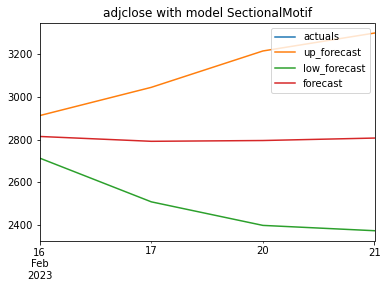

In [24]:
prediction = model.predict()
#plot a sample
prediction.plot(model.df_wide_numeric,
                series=model.df_wide_numeric.columns[0],
                start_date="2023-02-16")

Print the details of the best model

In [25]:
print(model)

Initiated AutoTS object with best model: 
SectionalMotif
{'fillna': 'KNNImputer', 'transformations': {'0': 'DifferencedTransformer', '1': 'AnomalyRemoval', '2': 'RobustScaler', '3': 'bkfilter'}, 'transformation_params': {'0': {}, '1': {'method': 'minmax', 'method_params': {'alpha': 0.05}, 'fillna': 'mean', 'transform_dict': {'transformations': {'0': 'DatepartRegression'}, 'transformation_params': {'0': {'datepart_method': 'simple_3', 'regression_model': {'model': 'FastRidge', 'model_params': {}}}}}}, '2': {}, '3': {}}}
{'window': 10, 'point_method': 'weighted_mean', 'distance_metric': 'nan_euclidean', 'include_differenced': True, 'k': 5, 'stride_size': 1, 'regression_type': None}
SMAPE: 1.1397964026366554, 9.554794506327498, 2.337302634440003
MAE: 31.755491917403923, 290.7929242348088, 77.34405251910835
SPL: 0.4999686640485656, 1.7204061540126168, 1.2750840194651867


Selecting stock for long Term Predection 

In [26]:
yahoo_financials = YahooFinancials('DIVISLAB.BO')
data=yahoo_financials.get_historical_price_data('2012-01-01','2022-01-01',"daily")
btc_df_l = pd.DataFrame(data['DIVISLAB.BO']['prices'])
btc_df_l = btc_df_l.drop('date', axis=1).set_index('formatted_date')
btc_df_l= btc_df_l[['adjclose']]

In [27]:
btc_df_l['Stock_Returns']=btc_df_l['adjclose'].pct_change()

In [28]:
btc_df_l['Stock_cumRETURNS']=btc_df_l['Stock_Returns'].cumsum().apply(np.exp)

In [29]:
btc_df_l.dropna(how='any',inplace=True)

Understanding cumulative return of stock for period considered 

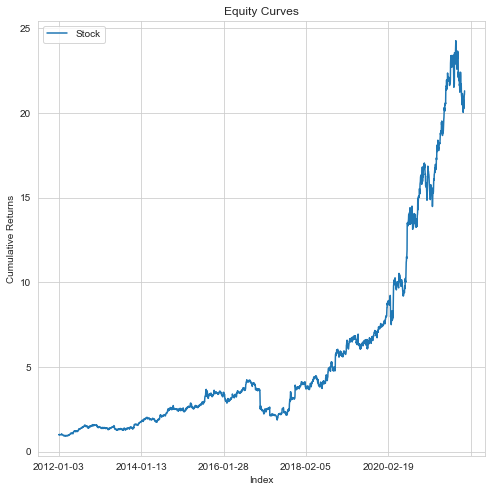

In [30]:
btc_df_l
sns.set_style('whitegrid')
btc_df_l['Stock_cumRETURNS'].plot(figsize=(8,8),label="Stock")
plt.title('Equity Curves')
plt.ylabel("Cumulative Returns")
plt.xlabel("Index")
plt.legend(loc='upper left')
plt.show()

Converting series to Time series 

In [31]:
df = btc_df_l[[ 'adjclose']]
df = df.sort_values('formatted_date')
df.index = pd.to_datetime(df.index)
df

,adjclose
formatted_date,
2012-01-03,351.252960
2012-01-04,351.364899
2012-01-05,345.767700
2012-01-06,345.678162
2012-01-09,355.394775
...,...
2021-12-27,4441.818848
2021-12-28,4490.297363
2021-12-29,4584.624512


Selecting train and test data

In [32]:
train_df = df.iloc[:2218]
test_df = df.iloc[2218:]

In [33]:
train_df

,adjclose
formatted_date,
2012-01-03,351.252960
2012-01-04,351.364899
2012-01-05,345.767700
2012-01-06,345.678162
2012-01-09,355.394775
...,...
2020-12-29,3743.464600
2020-12-30,3755.868408
2020-12-31,3797.675537


In [34]:
test_df

,adjclose
formatted_date,
2021-01-05,3796.093994
2021-01-06,3831.723877
2021-01-07,3763.577393
2021-01-08,3813.192383
2021-01-11,3778.056641
...,...
2021-12-27,4441.818848
2021-12-28,4490.297363
2021-12-29,4584.624512


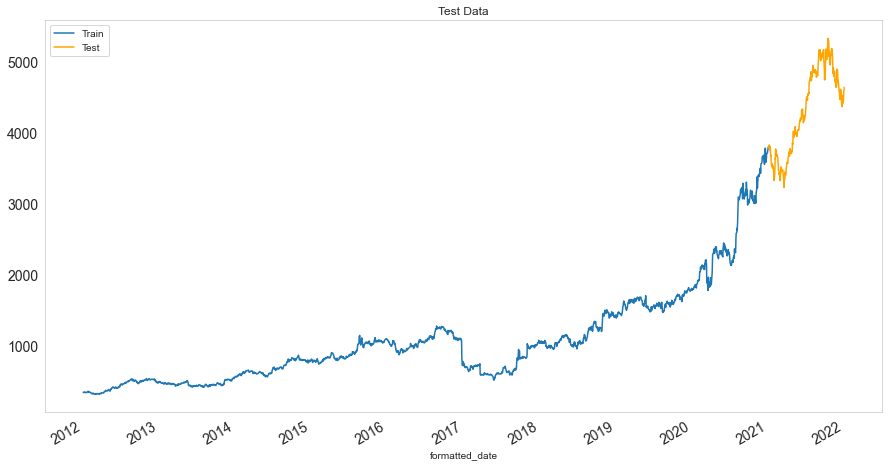

In [35]:
plt.title('DIVIS', size=20)
train_df.adjclose.plot(figsize=(15,8), title= 'Train Data', fontsize=14, label='Train')
test_df.adjclose.plot(figsize=(15,8), title= 'Test Data', fontsize=14, label='Test',color='orange')
plt.legend()
plt.grid()
plt.show()

Setting out various parameters for predection using AutoTS , setting out duration 2 years 

In [36]:
model = AutoTS(
    forecast_length=246,
    frequency='infer',
    prediction_interval=0.9,
    ensemble=None,
    model_list="fast",  # "superfast", "default", "fast_parallel"
    transformer_list="fast",  # "superfast",
    drop_most_recent=1,
    max_generations=4,
    num_validations=2,
    validation_method="backwards"
)

In [37]:
long = False

In [38]:
model = model.fit(
    train_df,
    date_col='datetime' if long else None,
    value_col='value' if long else None,
    id_col='series_id' if long else None,
)

Inferred frequency is: B
Model Number: 1 with model AverageValueNaive in generation 0 of 4
Model Number: 2 with model AverageValueNaive in generation 0 of 4
Model Number: 3 with model AverageValueNaive in generation 0 of 4
Model Number: 4 with model DatepartRegression in generation 0 of 4
Model Number: 5 with model DatepartRegression in generation 0 of 4
Model Number: 6 with model DatepartRegression in generation 0 of 4
Model Number: 7 with model DatepartRegression in generation 0 of 4
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 7: DatepartRegression
Model Number: 8 with model ETS in generation 0 of 4
Model Number: 9 with model ETS in generation 0 of 4
Model Number: 10 with model GLM in generation 0 of 4
Model Number: 11 with model GLM in generation 0 of 4
Model Number: 12 with model GLS in generation 0 of 4
Model Number: 13 with model GLS in generation 0 of 4
Model Number: 14 with model LastValueNaive in generation 0 of 4

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 40 with model NVAR in generation 0 of 4
Model Number: 41 with model Cassandra in generation 0 of 4
HolidayTransformer: no anomalies detected.
Template Eval Error: Exception("unrecognized dates: Index([], dtype='object', name='date')") in model 41: Cassandra
Model Number: 42 with model ConstantNaive in generation 0 of 4
Model Number: 43 with model LastValueNaive in generation 0 of 4
Model Number: 44 with model AverageValueNaive in generation 0 of 4
Model Number: 45 with model GLS in generation 0 of 4
Model Number: 46 with model SeasonalNaive in generation 0 of 4
Model Number: 47 with model GLM in generation 0 of 4
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 47: GLM
Model Number: 48 with model ETS in generation 0 of 4
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on adjclose with ValueError('endog must be strictly positive when usingmultiplicative 

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 198 with model ETS in generation 1 of 4
Model Number: 199 with model WindowRegression in generation 1 of 4
Model Number: 200 with model MetricMotif in generation 1 of 4
Model Number: 201 with model UnivariateMotif in generation 1 of 4
Model Number: 202 with model LastValueNaive in generation 1 of 4
Model Number: 203 with model KalmanStateSpace in generation 1 of 4
Model Number: 204 with model SeasonalNaive in generation 1 of 4
Model Number: 205 with model UnivariateMotif in generation 1 of 4
Model Number: 206 with model NVAR in generation 1 of 4
Model Number: 207 with model Cassandra in generation 1 of 4
Model Number: 208 with model AverageValueNaive in generation 1 of 4
Model Number: 209 with model ETS in generation 1 of 4
ETS error ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
ETS failed on adjclose with ValueError('endog must be strictly positive when usingmultiplicative trend or seasonal components.')
Model Number

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 320 with model DatepartRegression in generation 2 of 4
Model Number: 321 with model NVAR in generation 2 of 4
Model Number: 322 with model AverageValueNaive in generation 2 of 4
Model Number: 323 with model DatepartRegression in generation 2 of 4
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 323: DatepartRegression
Model Number: 324 with model MultivariateMotif in generation 2 of 4
Model Number: 325 with model ETS in generation 2 of 4
Model Number: 326 with model ConstantNaive in generation 2 of 4
Model Number: 327 with model MultivariateMotif in generation 2 of 4
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 327: MultivariateMotif
Model Number: 328 with model WindowRegression in generation 2 of 4
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 328: WindowRegression
Model Number: 329 with model LastValueNaive in generatio

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    4.6s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 300 out of 300 | elapsed:    0.0s finished


Model Number: 378 with model GLS in generation 3 of 4
Model Number: 379 with model NVAR in generation 3 of 4
Model Number: 380 with model SeasonalNaive in generation 3 of 4
Model Number: 381 with model Cassandra in generation 3 of 4
Model Number: 382 with model ConstantNaive in generation 3 of 4
Model Number: 383 with model RRVAR in generation 3 of 4
Model Number: 384 with model MAR in generation 3 of 4
Model Number: 385 with model GLS in generation 3 of 4
Model Number: 386 with model ETS in generation 3 of 4
ETS error ValueError('Can only dampen the trend component')
ETS failed on adjclose with ValueError('Can only dampen the trend component')
Model Number: 387 with model ConstantNaive in generation 3 of 4
Model Number: 388 with model NVAR in generation 3 of 4
Model Number: 389 with model AverageValueNaive in generation 3 of 4
Model Number: 390 with model AverageValueNaive in generation 3 of 4
Model Number: 391 with model ConstantNaive in generation 3 of 4
Model Number: 392 with model

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 449 with model MetricMotif in generation 3 of 4
Model Number: 450 with model WindowRegression in generation 3 of 4
Model Number: 451 with model MultivariateMotif in generation 3 of 4
Model Number: 452 with model Cassandra in generation 3 of 4
Model Number: 453 with model MultivariateMotif in generation 3 of 4
Model Number: 454 with model ETS in generation 3 of 4
ETS error ValueError('Can only dampen the trend component')
ETS failed on adjclose with ValueError('Can only dampen the trend component')
Model Number: 455 with model MetricMotif in generation 3 of 4
Model Number: 456 with model LastValueNaive in generation 3 of 4
Model Number: 457 with model SeasonalNaive in generation 3 of 4
HolidayTransformer: no anomalies detected.
Model Number: 458 with model LastValueNaive in generation 3 of 4
Model Number: 459 with model MetricMotif in generation 3 of 4
Model Number: 460 with model RRVAR in generation 3 of 4
Model Number: 461 with model MetricMotif in generation 3 of 4
New 

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-2)]: Done 436 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-2)]: Done 786 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:   29.3s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 436 tasks      | elapsed:    0.1s
[Parallel(n_jobs=7)]: Done 786 tasks      | elapsed:    0.2s
[Parallel(n_jobs=7)]: Done 1000 out of 1000 | elapsed:    0.2s finished


Model Number: 510 with model LastValueNaive in generation 4 of 4
Model Number: 511 with model Cassandra in generation 4 of 4
Template Eval Error: ImportError('GluonTS installation not found or installed version is incompatible with AutoTS.') in model 511: Cassandra
Model Number: 512 with model ConstantNaive in generation 4 of 4
Model Number: 513 with model AverageValueNaive in generation 4 of 4
Model Number: 514 with model AverageValueNaive in generation 4 of 4
Model Number: 515 with model NVAR in generation 4 of 4
Model Number: 516 with model AverageValueNaive in generation 4 of 4
Model Number: 517 with model LastValueNaive in generation 4 of 4
Model Number: 518 with model SectionalMotif in generation 4 of 4
Model Number: 519 with model GLM in generation 4 of 4
Model Number: 520 with model UnivariateMotif in generation 4 of 4
Model Number: 521 with model Cassandra in generation 4 of 4
Model Number: 522 with model SeasonalityMotif in generation 4 of 4
Model Number: 523 with model Cassa

Initiated AutoTS object with best model: 
NVAR
{'fillna': 'nearest', 'transformations': {'0': 'SinTrend', '1': 'MaxAbsScaler', '2': 'bkfilter', '3': 'KalmanSmoothing'}, 'transformation_params': {'0': {}, '1': {}, '2': {}, '3': {'model_name': 'local linear hidden state with seasonal 7', 'state_transition': [[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 0.0], [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]], 'process_noise': [[0.0016, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1e-06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0

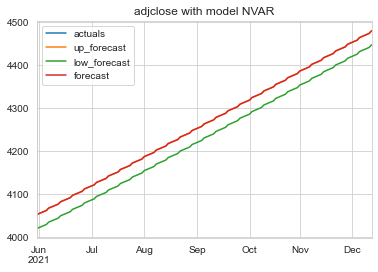

In [39]:
prediction = model.predict()

#plot a sample
prediction.plot(model.df_wide_numeric,
                series=model.df_wide_numeric.columns[0],
                start_date="2021-05-30")

print(model)

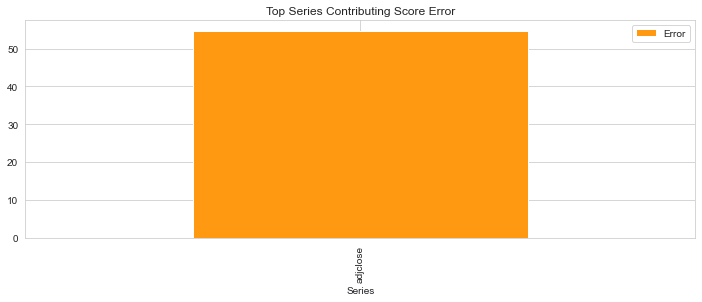

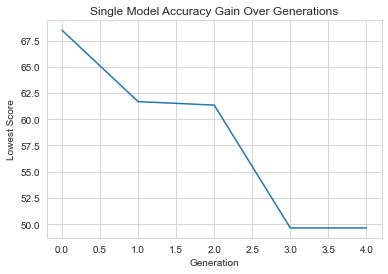

In [40]:
model.plot_per_series_error()
plt.show()

model.plot_generation_loss()
plt.show()

In [41]:
# point forecasts dataframe
forecasts_df = prediction.forecast
# upper and lower forecasts
forecasts_up, forecasts_low = prediction.upper_forecast, prediction.lower_forecast

Forecasting

In [42]:
forecasts_df

,adjclose
2021-01-04,3748.505378
2021-01-05,3750.707817
2021-01-06,3752.910858
2021-01-07,3755.114502
2021-01-08,3757.318749
...,...
2021-12-07,4465.867388
2021-12-08,4468.272939
2021-12-09,4470.679092
2021-12-10,4473.085849


In [43]:
# accuracy of all tried model results
model_results = model.results()
# and aggregated from cross validation
validation_results = model.results("validation")

In [44]:
model_results

,ID,Model,ModelParameters,TransformationParameters,TransformationRuntime,FitRuntime,PredictRuntime,TotalRuntime,Ensemble,Exceptions,...,spl_weighted,containment_weighted,contour_weighted,maxe_weighted,oda_weighted,dwae_weighted,mqae_weighted,ewmae_weighted,TotalRuntimeSeconds,Score
0,5e75ed52611fa9266c855f5876eb8720,AverageValueNaive,"{""method"": ""Mean"", ""window"": null}","{""fillna"": ""fake_date"", ""transformations"": {""0...",0 days 00:00:00.031461,0 days 00:00:00.004334,0 days 00:00:00.017135,0 days 00:00:00.065862,0,NaN,...,25.728230,0.951220,0.508130,1752.326576,0.926829,6.849128,611.298228,3843.755164,0.0659,146.329644
1,32c21e08eec3d98d9158c35dfb4410ba,AverageValueNaive,"{""method"": ""Mean"", ""window"": null}","{""fillna"": ""mean"", ""transformations"": {""0"": ""C...",0 days 00:00:00.030743,0 days 00:00:00.000995,0 days 00:00:00.004980,0 days 00:00:00.048832,0,NaN,...,55.726064,0.028455,0.402439,1934.734253,0.926829,6.950419,688.758884,4298.051718,0.0488,211.733720
2,d8bd60351c03557d2b76a1f72be762ff,AverageValueNaive,"{""method"": ""Mean"", ""window"": null}","{""fillna"": ""rolling_mean_24"", ""transformations...",0 days 00:00:00.013544,0 days 00:00:00,0 days 00:00:00.005587,0 days 00:00:00.029125,0,NaN,...,68.243395,0.000000,0.520325,2904.339921,0.024390,439.685098,1656.476865,7919.662153,0.0291,372.863491
3,3c205c901c969cb3f2380ccc43f7a36f,DatepartRegression,"{""regression_model"": {""model"": ""DecisionTree"",...","{""fillna"": ""mean"", ""transformations"": {""0"": ""C...",0 days 00:00:00.031031,0 days 00:00:00,0 days 00:00:00.735260,0 days 00:00:00.785427,0,NaN,...,56.314538,0.028455,0.386179,1934.734253,0.516260,78.515746,753.006319,4407.397479,0.7854,219.701974
4,68a0c53e76c612a8e64a8b9057930f33,DatepartRegression,"{""regression_model"": {""model"": ""SVM"", ""model_p...","{""fillna"": ""zero"", ""transformations"": {""0"": ""C...",0 days 00:00:00.029263,0 days 00:00:00,0 days 00:00:00.582433,0 days 00:00:00.721193,0,NaN,...,67.202172,0.000000,0.443089,2364.723059,0.024390,327.527303,1170.995440,5967.460535,0.7212,294.444513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,7bf4d1f7e67eebc55c6197003a110d59,GLS,{},"{""fillna"": ""ffill_mean_biased"", ""transformatio...",0 days 00:00:00.383106,0 days 00:00:00,0 days 00:00:00.418422,0 days 00:00:00.807989,0,NaN,...,5.709823,0.646341,0.565041,590.228409,0.735772,17.553764,202.026721,1184.659548,0.8080,65.234186
732,4aa3269203c986d4bef91d775ec0fb58,LastValueNaive,{},"{""fillna"": ""zero"", ""transformations"": {""0"": ""H...",0 days 00:00:00.065377,0 days 00:00:00,0 days 00:00:00.002988,0 days 00:00:00.076156,0,NaN,...,13.772677,0.182927,0.560976,562.761122,0.926829,4.115945,172.473976,1076.503701,0.0762,74.131129
733,55e76d9729ec9ccc1354f548cbc80670,KalmanStateSpace,"{""state_transition"": [[1, 0], [1, 0]], ""proces...","{""fillna"": ""rolling_mean_24"", ""transformations...",0 days 00:00:00.015036,0 days 00:00:03.820870,0 days 00:00:00.114465,0 days 00:00:03.956492,0,NaN,...,11.066733,0.272358,0.434959,654.103463,0.926829,4.369660,216.398577,1313.170299,3.9565,79.551686
734,2ef2a395a9961a52e4160d210e674656,DatepartRegression,"{""regression_model"": {""model"": ""DecisionTree"",...","{""fillna"": ""rolling_mean"", ""transformations"": ...",0 days 00:00:00.008043,0 days 00:00:00,0 days 00:00:00.420231,0 days 00:00:00.437112,0,NaN,...,10.383085,0.581301,0.565041,646.537989,0.926829,4.332214,216.635807,1302.367206,0.4371,77.060977


In [45]:
validation_results

,ID,Model,ModelParameters,TransformationParameters,Ensemble,Runs,smape,mae,rmse,made,...,spl_weighted,maxe_weighted,oda_weighted,dwae_weighted,mqae_weighted,ewmae_weighted,containment_weighted,contour_weighted,TotalRuntimeSeconds,Score
0,016e1e6b24940752cb4ddeef255cfc31,LastValueNaive,{},"{""fillna"": ""linear"", ""transformations"": {""0"": ...",0,1,39.368780,926.777414,1074.294410,2.619963,...,53.564616,1988.692931,0.024390,253.707519,815.059780,4659.543465,0.000000,0.605691,0.0224,220.730182
1,0181278de69621582f7c03c262606646,ETS,"{""damped_trend"": false, ""trend"": null, ""season...","{""fillna"": ""zero"", ""transformations"": {""0"": ""M...",0,1,41.426990,945.297316,1140.425113,12.626552,...,31.478619,2889.324960,0.369919,227.256959,811.117278,4812.943031,0.434959,0.491870,0.5789,193.311110
2,018faee618ed0cd0cf6b67454669bddc,SeasonalityMotif,"{""window"": 7, ""point_method"": ""median"", ""dista...","{""fillna"": ""ffill_mean_biased"", ""transformatio...",0,1,34.085971,828.821630,1011.439487,3.614295,...,63.344400,1941.814960,0.373984,190.199649,711.323297,4373.485759,0.000000,0.544715,0.0397,227.258404
3,01e440ab2a1f5d0560871ccbfdb94ee6,GLS,{},"{""fillna"": ""median"", ""transformations"": {""0"": ...",0,1,102.388067,1840.065960,1929.131510,2.846211,...,60.893132,2968.952087,0.024390,454.096368,1721.158810,8161.896861,0.000000,0.390244,0.5105,372.182805
4,02af89a1a3cae9c8373608b3d132fb23,SectionalMotif,"{""window"": 10, ""point_method"": ""weighted_mean""...","{""fillna"": ""KNNImputer"", ""transformations"": {""...",0,1,25.693396,655.607256,811.450432,3.244406,...,38.487071,1593.412794,0.890244,12.470759,567.016718,3457.803931,0.073171,0.508130,0.0453,161.153994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,fe3449f14d3160fe3c77c6cbb5d02e12,Cassandra,"{""preprocessing_transformation"": {""fillna"": ""c...","{""fillna"": ""zero"", ""transformations"": {""0"": ""M...",0,1,80.371930,1560.485443,1693.503267,3.354336,...,98.452653,2554.382387,0.024390,399.631713,1455.195403,7167.197280,0.000000,0.430894,0.4774,393.994547
503,fe861a9b4fd0687b990171ec5552d49f,AverageValueNaive,"{""method"": ""Mean"", ""window"": null}","{""fillna"": ""piecewise_polynomial"", ""transforma...",0,1,29.011406,727.570041,898.951371,2.572604,...,24.951436,1765.453611,0.910569,6.938706,618.409594,3880.581872,0.947154,0.556911,0.0456,145.517830
504,fe943ca402a42978e076802a9d3e1dc8,AverageValueNaive,"{""method"": ""Mean"", ""window"": 28}","{""fillna"": ""rolling_mean"", ""transformations"": ...",0,1,34.636448,840.069827,1020.124346,2.586368,...,48.899675,1967.451972,0.024390,240.963118,721.219971,4422.572539,0.008130,0.487805,0.0252,202.973638
505,ffa296c3e97d20fc17a7811e825496d3,SeasonalNaive,"{""method"": ""median"", ""lag_1"": 168, ""lag_2"": 12}","{""fillna"": ""pad"", ""transformations"": {""0"": ""Cl...",0,1,34.405502,835.578924,1016.808849,2.607878,...,76.985783,1964.186881,0.178862,224.094871,715.346437,4412.994132,0.000000,0.508130,0.4214,252.007032


In [46]:
import autots
import pickle

# Create an AutoTS model
#model = autots.AutoTS()

# Fit the model to data
#model.fit(model)

# Save the model as a pickle file
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

DEPLOYEMENT

In [48]:
import streamlit as st
import pandas as pd
import joblib

# Load the model
model = joblib.load(r"C:\Users\Praneeth\Downloads\model.pkl")

st.title('Stock Prediction')
st.write('Enter the stock symbol and date range to make a prediction')
symbol = st.text_input( 'DIVISLAB.BO')
start_date = st.date_input('2012-01-01')
end_date = st.date_input('2022-01-01')

# Define the prediction function
def predict(symbol, start_date, end_date):
    # Load the stock data
    df = pd.read_csv(f'{symbol}.csv')
    df['Date'] = pd.to_datetime(df['Date'])
    mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
    df = df.loc[mask]
    
    # Make the prediction
    X = df.drop(['Date', 'Close'], axis=1)
    pred = model.predict(X)
    
    # Return the prediction
    return pred[0]

# Call the prediction function and display the result
if st.button('Predict'):
    result = predict(symbol, start_date, end_date)
    st.write(f'The predicted closing price is {result:.2f}')